# Parte 2 - Pregunta Práctica

Marco Jurado 20308

Cristian Aguirre 20231

In [1]:
import numpy as np

np.random.seed(2023)

# Parámetros de simulación
num_simulations = 1000
initial_investment = 1000000
investment_horizon = 5
discount_rate = 0.1

# Función de simulación actualizada
def simulate_cash_flows(params):
    interest_rate, volatility = params
    
    num_steps = investment_horizon * 252
    simulated_returns = np.random.normal((interest_rate - 0.5 * volatility**2) / 252, volatility / np.sqrt(252), (num_steps, num_simulations))
    simulated_prices = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))
    
    final_prices = simulated_prices[-1, :]
    capital_gains_losses = final_prices - initial_investment
    
    # Descuento de los flujos de caja futuros
    npv = np.mean(capital_gains_losses) / (1 + discount_rate) ** investment_horizon
    
    return npv

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# Definir el problema para SALib
problem = {
    'num_vars': 2,
    'names': ['interest_rate', 'volatility'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}

# Generar muestras
param_values = saltelli.sample(problem, 1000)

# Evaluar modelo
Y = np.array([simulate_cash_flows(params) for params in param_values])

# Calcular índices Sobol
Si = sobol.analyze(problem, Y)

C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_17004\2627522313.py:13: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [7]:
print(f"Tasa de interés: {round(Si['ST'][0] * 100,2)}%")
print(f"Volatilidad: {round(Si['ST'][1] * 100,2)}%")

Tasa de interés: 99.34%
Volatilidad: 6.03%


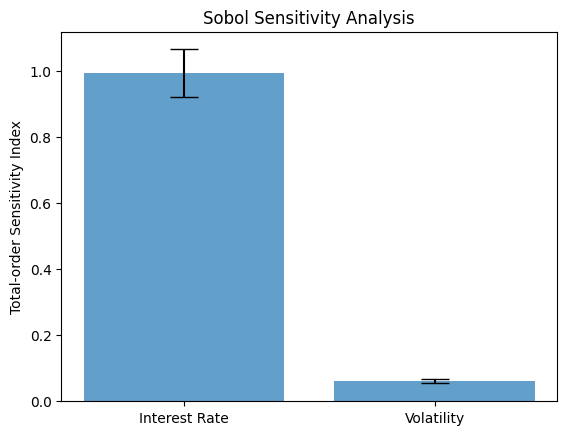

In [3]:
# Visualización
plt.bar(range(2), [Si['ST'][0], Si['ST'][1]], yerr=[Si['ST_conf'][0], Si['ST_conf'][1]], align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(range(2), ['Interest Rate', 'Volatility'])
plt.ylabel('Total-order Sensitivity Index')
plt.title('Sobol Sensitivity Analysis')
plt.show()

Prompt utilizado para integrar un análisis de sensibilidad global utilizando indices sobol

https://chat.openai.com/share/445c862d-2165-4f7e-a2b7-adb5e17df7e7

NOTA: Se tuvieron que hacer modificaciones para integrarlo con nuestra simulación

**1. ¿Qué tanto influye cada variable en el VPN?**

De acuerdo con los resultados mostrados en la gráfica podemos ver que la tasa de interés está influyendo en un 99.34% de la varianza del VAN y la volatilidad en un 6.03%. 

**2. ¿Qué variable influye más? ¿Por qué cree que es esto?**

Como se mencionó anteriormente, la variable que más influye y por una gran diferencia, es la tasa de interés y llegamos a la conclusión de que esto se debe a la forma en que la tasa de interés afecta directamente al descuento de los flujos de caja en el cálculo del VAN. Un cambio en la tasa de interés tiene un impacto directo en el valor presente de los flujos de caja futuros, mientras que la volatilidad, que afecta la dispersión de los flujos de efectivo, podría tener un impacto menos directo en el VAN.

**3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?**

Sí, si hay una diferencia significativa en la influencia las variables ya que como podemos ver en el análisis de sensibilidad, la tasa de interés influye muchisimo más de lo que lo hace la volatilidad. Como se mencionó en el enunciado anterior, esto se puede deber a la forma en la que se está calculando el VPN pues la tasa de interés afecta en el descuento del flujo de caja de manera directa. 

**4. Si tuviera que hacer mejoras al análisis ¿qué podría hacer?**

Prompt: *https://chat.openai.com/share/ce62833f-161a-410e-a9e0-eba3a9014866*

Las mejoras que se le puedan hacer a un modelo depende mucho de lo que queremos conseguir y los resultados que queremos obtener, para este caso práctico considero que el modelo cumple satisfactoriamente con los requerimentos que necesitabamos y obtuvimos buenos resultados, sin embargo siempre podemos mejorar algunos aspectos, como los siguientes.

- Analizar Interacciones: Considera calcular los índices de Sobol de segundo orden para estudiar cómo combinaciones de variables, como tasa de interés y volatilidad, influyen conjuntamente en el VAN.

- Mayor Número de Simulaciones: Aumentar las simulaciones puede ofrecer estimaciones más precisas de los índices, especialmente en sistemas con alta complejidad.

- Convergencia de Índices: Realiza un análisis de convergencia para asegurarte de que la cantidad de muestras es adecuada y que los índices de Sobol están estabilizándose.

- Análisis de Sensibilidad Local: Además del enfoque global, evalúa cómo pequeñas variaciones en las entradas cerca de puntos específicos afectan el VAN, para un entendimiento más detallado.

- Validación del Modelo: Es vital asegurarse de que tu modelo refleja adecuadamente la realidad y las dinámicas de los flujos de efectivo y del VAN.